In [165]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

### The Quantum Object 


### Bra-Ket Notation

In [2]:
Qobj()

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

The base quantum object is a **bra** vector denoted by $\langle \psi|$

This is the equivalent of a 1x1 matrix with zero as the only entry.

Creating a bra vector with data using list comp:

In [3]:
Qobj([[x for x in range(5)]])

Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 1. 2. 3. 4.]]

In [4]:
Qobj([[x] for x in range(5)])

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]]

A **ket** vector, represented by $|\psi\rangle$ is the equivalent of a column vector. In this notation, we have created a 1x5 column vector.

- qtip rundown

- Bra / Ket notation

- Commutators

- Spin

- tunneling

- Hilbert Space

- Back prop parameters


A random vector, really an **operator**

In [5]:
r = np.random.rand(4,4)
r

array([[0.0564895 , 0.54579253, 0.67108686, 0.17920478],
       [0.93823379, 0.18220042, 0.15809312, 0.58583503],
       [0.06984861, 0.07975924, 0.70962963, 0.48076601],
       [0.59337955, 0.57045075, 0.89313942, 0.52927384]])

In [6]:
Qobj(r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.0564895  0.54579253 0.67108686 0.17920478]
 [0.93823379 0.18220042 0.15809312 0.58583503]
 [0.06984861 0.07975924 0.70962963 0.48076601]
 [0.59337955 0.57045075 0.89313942 0.52927384]]

### Creating a Hilbert Space

### fock state operator

- The equivalent of a particle selector operator $\hat{N}_{k}$ where $\sum_{i}\hat{N}_{k_{i}}$ = $\hat{N}$ (the total number of particles in a system).

In [7]:
basis(10, 3)

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In multi-dimensional space:

In [8]:
fock_dm(10, 3)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

### Operator Example

***Destruction Operator***

The lowering operator, removes elements of a matrix below a particular ground state. It is particularly useful for the case of the Quantum Harmonic Oscillator.

In [9]:
d = destroy(4)

In [10]:
d.data

<4x4 sparse matrix of type '<class 'numpy.complex128'>'
	with 3 stored elements in Compressed Sparse Row format>

***Sparse matrices are the default storage type***

In [11]:
d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]

### Matrix Mathematics 

- Adding constants

In [12]:
d + 5

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[5.         1.         0.         0.        ]
 [0.         5.         1.41421356 0.        ]
 [0.         0.         5.         1.73205081]
 [0.         0.         0.         5.        ]]

adding or subtracting a constant *a* is the equivalent of adding/subtracting $a\hat{I}$ where $\hat{I}$ is the identity matrix.

- Multiplication follows the normal definition of the inner (dot) product

In [13]:
spin_operator = sigmax()

In [14]:
spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [15]:
spin_operator * spin_operator

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In Bra-Ket notation the inner product is simplified:

$$\langle\psi_{a} | \psi_{b}\rangle$$

Represents the inner product of two vectors, a **bra** on the left and a **ket** on the right.

- Chained dot product

In [16]:
d ** 3

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

Is the equivalent of:

In [17]:
d * d * d

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]

### Operations on Quantum Objects

Support exists for a variety of handy linear algebra functions such as eigenvalues, eigenvectors, diagonals, traces, hermitian conjugation etc.

In [18]:
space = basis(8, 1)
space

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

The adjoint operator $\dagger\$, often referred to as the **dagger** operator takes the transpose of a matrix.

In [19]:
space.dag()

Quantum object: dims = [[1], [8]], shape = (1, 8), type = bra
Qobj data =
[[0. 1. 0. 0. 0. 0. 0. 0.]]

- Diagonals

In [20]:
coherent_density_matrix = coherent_dm(5,1)
coherent_density_matrix

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.36791117 0.36774407 0.26105441 0.14620658 0.08826704]
 [0.36774407 0.36757705 0.26093584 0.14614018 0.08822695]
 [0.26105441 0.26093584 0.18523331 0.10374209 0.06263061]
 [0.14620658 0.14614018 0.10374209 0.05810197 0.035077  ]
 [0.08826704 0.08822695 0.06263061 0.035077   0.0211765 ]]

In [21]:
coherent_density_matrix.diag()

array([0.36791117, 0.36757705, 0.18523331, 0.05810197, 0.0211765 ])

- Ladder op example

#### Distance metrics for determining how close to density matrix distributions are to each other

- Trace Distance

- fidelity

- Hilbert-Schmidt distance

- Bures-distance

- Bures angle

- Hellinger distance

***Comparisons of train/test splits for distributions?***

### Quantum Mechanics:

Easy stuff first! 

#### The Time Dependent Schroedinger Equation:

$$i\hbar \frac{\partial \Psi}{\partial t} = -\frac{\hbar^2}{2m}
\frac{\partial^2 \Psi}{\partial x^2} + V \Psi$$

This equation is a PDE, where the wavefunction $\Psi(\hat{r}, t)$ is function of both position and time. 

The Hamiltonian operator $\hat{H}$ represents the classical total energy of a quantum system (Kinetic + Potential).

In operator form:

$$\hat{H}\Psi=E\ \Psi$$

By assuming that the wave function can be expressed as the product of two functions, $\psi(\hat{r})$ and $\phi(t)$, separation of variables can be employed and the separation constant C of the time independent equition represents the allowed energies (eigenenergies) of the operator $\hat{H}$.

It is often favorable to represent the operator $\hat{H}$ in terms of its **eigenvectors** where the resultant matrix consists of all off-diagonal elements equal to zero and the diagonal formed by the eigenenergies.

Let's build a simple neural net from scratch with a relu activation function.

In [22]:
data = np.array([[0,0], [0,1], [1,0], [1,1]])
Qobj(data)

Quantum object: dims = [[4], [2]], shape = (4, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

In [23]:
target = np.array([[0],[1],[1],[1]])
Qobj(target)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [1.]
 [1.]]

In [24]:
start_weights = np.array([[0.2], [0.8]])
Qobj(start_weights)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.2]
 [0.8]]

In [25]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def activation(x):
    return sigmoid(x)
def activation_prime(x):
    
    return sigmoid_prime(x)

In [26]:
n_iters = 10000

In [207]:
##
weights = start_weights
bias = 0.5
lr = 0.10
results = []
for epoch in range(n_iters):
    inputs = Qobj(data)
    #print(inputs)
    in_o = inputs * Qobj(weights) + bias
    #print(in_o)
    out_o = Qobj(activation(in_o))
    #print(out_o)
    error = out_o - Qobj(target)
    x = sum(abs(error))
    #print(x)

    derror_douto = error

    douto_dino = Qobj(activation_prime(out_o))

    #print(douto_dino)
    #print(derror_douto)
    deriv = derror_douto
    for r, c in enumerate(deriv):  #does this do a hadamard product/
        deriv.data[r] *= douto_dino.data[r]

    #print(deriv)

    inputs = inputs.trans()
    #print(inputs)
    deriv_final = inputs * deriv
    #print(deriv_final)
    test = lr * deriv_final
    #print(test)
    weights -= lr * deriv_final

    for i in deriv:
        #print(i)
        #print(lr * 1)
        bias -= lr * i
    print(f'Epoch:{epoch} B:{bias[0][0]} Error:{x[0][0]}', end='\r')
    epoch_results = {
        'epoch': epoch,
        'bias': bias[0][0],
        'error': x.data[0]  #absolute deviation
    }
    [
        epoch_results.update({f'weight_{i}': weight[0][0]})
        for i, weight in enumerate(weights)
    ]
    #print(epoch_results)
    results.append(epoch_results)

In [209]:
results

[{'epoch': 0,
  'bias': (4.390111085830736+0j),
  'error': (492.5469327441704+0j),
  'weight_0': (-7.3569649600538956+0j),
  'weight_1': (-4.299818736758727+0j),
  'weight_2': (-7.664547133041388+0j),
  'weight_3': (-7.794127838566919+0j),
  'weight_4': (-4.556069927410256+0j),
  'weight_5': (-7.644852444338538+0j),
  'weight_6': (-8.712908902324438+0j),
  'weight_7': (-9.339295069728779+0j),
  'weight_8': (-4.3722592723364855+0j),
  'weight_9': (-0.903858613409153+0j),
  'weight_10': (-5.916489833485417+0j),
  'weight_11': (-0.12200567590388128+0j),
  'weight_12': (-6.559556471083287+0j),
  'weight_13': (-6.133091237849894+0j),
  'weight_14': (0.11139281634279197+0j),
  'weight_15': (-4.551973953111602+0j),
  'weight_16': (-4.488901435821274+0j),
  'weight_17': (-5.942959190459453+0j),
  'weight_18': (-0.43061080644346206+0j),
  'weight_19': (-2.264313318263726+0j),
  'weight_20': (-7.839775594081688+0j),
  'weight_21': (-4.349910850227983+0j),
  'weight_22': (-8.018245310345241+0j),


In [176]:
x.data[0]

(8.033240498255358+0j)

Text(0.5, 1.0, 'Error by Epoch')

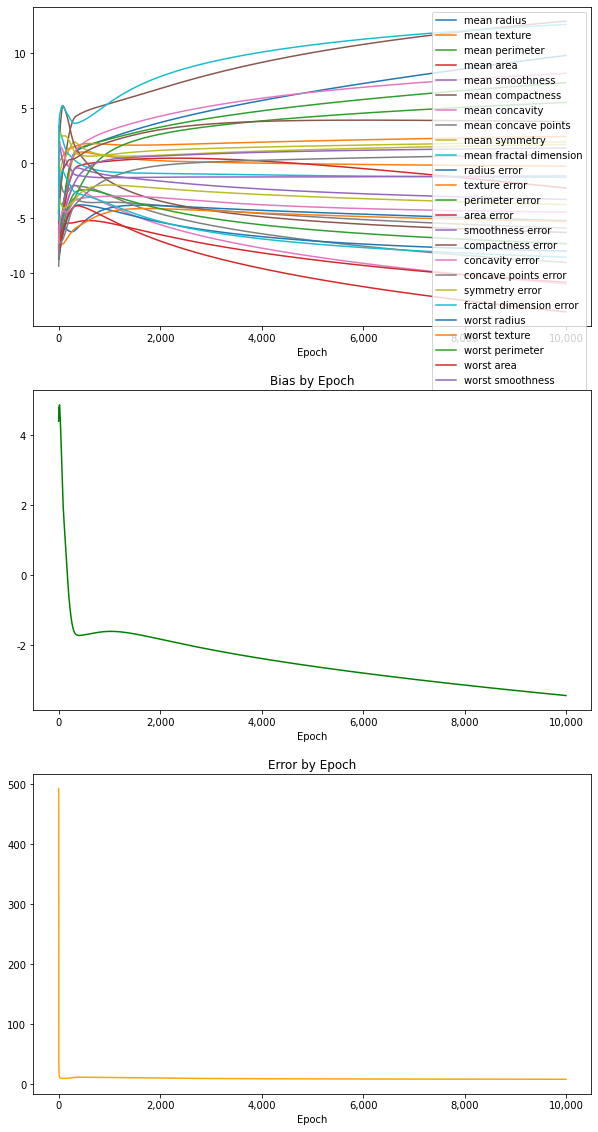

In [223]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
weight_plots = []
for i, weight in enumerate(weights.data):
    p = sns.lineplot(x=[x['epoch'] for x in results],
                     y=[x[f'weight_{i}'] for x in results],
                     ax=ax[0],
                     label=cancer_data['feature_names'][i])
    weight_plots.append(p)
#p2 = sns.lineplot(x=[x['epoch'] for x in results], y=[x['weight_2'].data[0] for x in results], c='blue', ax=ax[0])
p3 = sns.lineplot(x=[x['epoch'] for x in results],
                  y=[x['bias'] for x in results],
                  c='green',
                  ax=ax[1])
p4 = sns.lineplot(x=[x['epoch'] for x in results],
                  y=[x['error'] for x in results],
                  c='orange',
                  ax=ax[2])
weight_plots.append(p3)
weight_plots.append(p4)
for f in weight_plots:
    f.set_xlabel('Epoch')
    f.set_xticklabels([f'{x:,.0f}' for x in f.get_xticks()])
    f.set_yticklabels([f'{y:,.0f}' for y in f.get_yticks()])

p3.set_title('Bias by Epoch')
p4.set_title('Error by Epoch')

In [214]:
df_results = pd.DataFrame(results)

In [228]:
sample_results = df_results[(df_results.epoch < 100) &
          (df_results.epoch >= 1)]#.plot(x='epoch', y='error')

Text(0.5, 1.0, 'Error by Epoch')

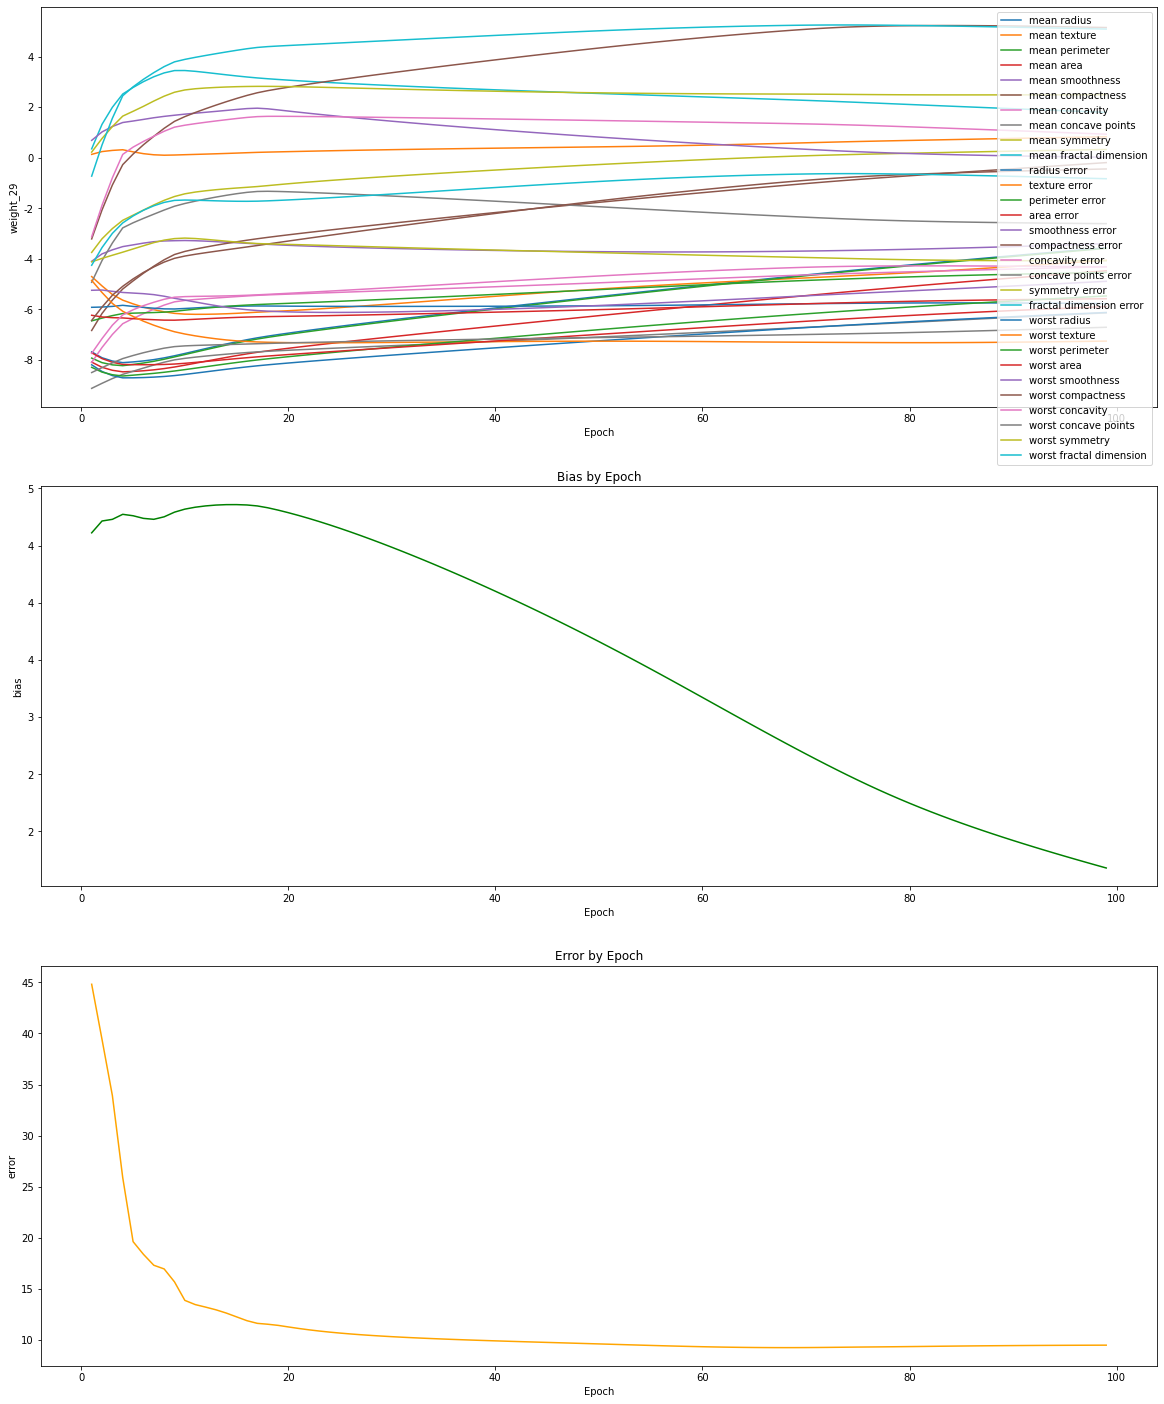

In [230]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 25))
weight_plots = []
for i, name in enumerate(cancer_data['feature_names']):
    p = sns.lineplot(x=sample_results['epoch'],
                     y=sample_results[f'weight_{i}'],
                     ax=ax[0],
                     label=name)
    weight_plots.append(p)
#p2 = sns.lineplot(x=[x['epoch'] for x in results], y=[x['weight_2'].data[0] for x in results], c='blue', ax=ax[0])
p3 = sns.lineplot(x=sample_results['epoch'],
                  y=sample_results['bias'],
                  c='green',
                  ax=ax[1])
p4 = sns.lineplot(x=sample_results['epoch'],
                  y=sample_results['error'],
                  c='orange',
                  ax=ax[2])
weight_plots.append(p3)
weight_plots.append(p4)
for f in weight_plots:
    f.set_xlabel('Epoch')
    f.set_xticklabels([f'{x:,.0f}' for x in f.get_xticks()])
    f.set_yticklabels([f'{y:,.0f}' for y in f.get_yticks()])

p3.set_title('Bias by Epoch')
p4.set_title('Error by Epoch')

Make predictions:

In [60]:
inputs = Qobj(np.array([1,1]))

In [61]:
inputs.trans()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 1.]]

In [62]:
result = inputs.trans() * weights + bias

In [63]:
activation(result)

array([[1.+0.j]])

In [64]:
inputs = Qobj(np.array([0,0]))

In [65]:
result = inputs.trans() * weights + bias

In [66]:
activation(result)

array([[1.88364941e-17+0.j]])

In [67]:
inputs = Qobj(np.array([0,1]))

In [68]:
result = inputs.trans() * weights + bias

In [69]:
activation(result)

array([[0.81578667+0.j]])

In [70]:
inputs = Qobj(np.array([1,0]))

In [71]:
result = inputs.trans() * weights + bias

In [72]:
activation(result)

array([[0.81578667+0.j]])

In [79]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [167]:
scaler = StandardScaler()
data_xform = scaler.fit_transform(cancer_data['data'])


In [169]:
data = Qobj(data_xform)
data

Quantum object: dims = [[569], [30]], shape = (569, 30), type = oper, isherm = False
Qobj data =
[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]

(1.514235920028231+0j)

In [139]:
target = Qobj(cancer_data['target'])
target

Quantum object: dims = [[569], [1]], shape = (569, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [140]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [141]:
data.dims[1][0]

30

In [142]:
np.random.random(30)

array([0.61982123, 0.17492077, 0.16358997, 0.26868616, 0.7725905 ,
       0.10575219, 0.99771453, 0.45234921, 0.87197187, 0.79376616,
       0.97577011, 0.34527316, 0.60955397, 0.54237069, 0.38503976,
       0.50918674, 0.81316289, 0.65579857, 0.54820334, 0.92817734,
       0.13827101, 0.15302353, 0.59596818, 0.06657837, 0.03909225,
       0.70318464, 0.9275149 , 0.12969703, 0.22563766, 0.74163266])

In [195]:
start_weights = np.array([[x] for x in np.random.random((data.dims[1][0]))])
start_weights

array([[0.7258454 ],
       [0.18678913],
       [0.66066144],
       [0.10080445],
       [0.62121511],
       [0.62532677],
       [0.26007563],
       [0.14064891],
       [0.61380547],
       [0.92715616],
       [0.88341552],
       [0.25774828],
       [0.22740423],
       [0.23547467],
       [0.57282684],
       [0.89547726],
       [0.2128365 ],
       [0.37391691],
       [0.49843442],
       [0.95884528],
       [0.78223969],
       [0.44406676],
       [0.78860297],
       [0.7868857 ],
       [0.05887503],
       [0.7805438 ],
       [0.13457841],
       [0.91574641],
       [0.90135732],
       [0.03951795]])

In [99]:
np.random?

## TODO:

- Train/Test split on cancer set
- Test randomization of weights
- Test random bias
- add layers
- make predictions